In [1]:
# Importing the necessary libraries to use in my project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AUDUSD.csv')
data.head()

,Time,Open,High,Low,Close
0,2023.08.09 07:35:00,0.65499,0.65527,0.65497,0.65520
1,2023.08.09 07:40:00,0.65520,0.65547,0.65520,0.65544
2,2023.08.09 07:45:00,0.65545,0.65549,0.65533,0.65538
3,2023.08.09 07:50:00,0.65538,0.65551,0.65524,0.65525
4,2023.08.09 07:55:00,0.65525,0.65539,0.65517,0.65536


In [3]:
data.tail()

,Time,Open,High,Low,Close
99995,2024.12.10 16:40:00,0.63866,0.63866,0.63844,0.63862
99996,2024.12.10 16:45:00,0.63862,0.63893,0.63854,0.63861
99997,2024.12.10 16:50:00,0.63861,0.63873,0.63830,0.63841
99998,2024.12.10 16:55:00,0.63841,0.63846,0.63817,0.63833
99999,2024.12.10 17:00:00,0.63833,0.63848,0.63833,0.63844


In [4]:
# Checking for missing values
print(data.isnull().sum())

Time     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [5]:
# Summary statistics
print(data.describe())

                Open           High            Low          Close
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.657681       0.657828       0.657533       0.657683
std         0.013084       0.013077       0.013090       0.013084
min         0.627150       0.627320       0.626940       0.627150
25%         0.648730       0.648880       0.648590       0.648730
50%         0.657290       0.657430       0.657135       0.657290
75%         0.666630       0.666760       0.666510       0.666630
max         0.694030       0.694160       0.693820       0.694030


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  object 
 1   Open    100000 non-null  float64
 2   High    100000 non-null  float64
 3   Low     100000 non-null  float64
 4   Close   100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# Converting the 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    100000 non-null  datetime64[ns]
 1   Open    100000 non-null  float64       
 2   High    100000 non-null  float64       
 3   Low     100000 non-null  float64       
 4   Close   100000 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.8 MB


In [9]:
# Sorting the dataset by 'Time' to ensure proper time sequence even though my dataset appears to be ordered
data = data.sort_values(by='Time')
data.head()

,Time,Open,High,Low,Close
0,2023-08-09 07:35:00,0.65499,0.65527,0.65497,0.65520
1,2023-08-09 07:40:00,0.65520,0.65547,0.65520,0.65544
2,2023-08-09 07:45:00,0.65545,0.65549,0.65533,0.65538
3,2023-08-09 07:50:00,0.65538,0.65551,0.65524,0.65525
4,2023-08-09 07:55:00,0.65525,0.65539,0.65517,0.65536


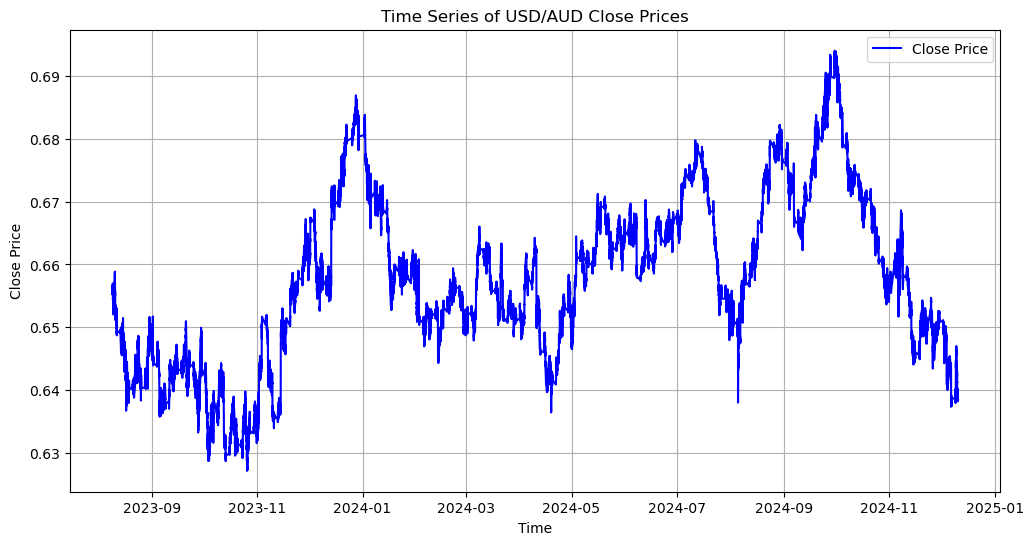

In [10]:
# Time-series plot for the 'Close' prices to:
# Visualize trends in the price over time.
# Detect seasonality (if any).
# Spot anomalies or unusual price movements.
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Close'], label='Close Price', color='blue')
plt.title('Time Series of USD/AUD Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

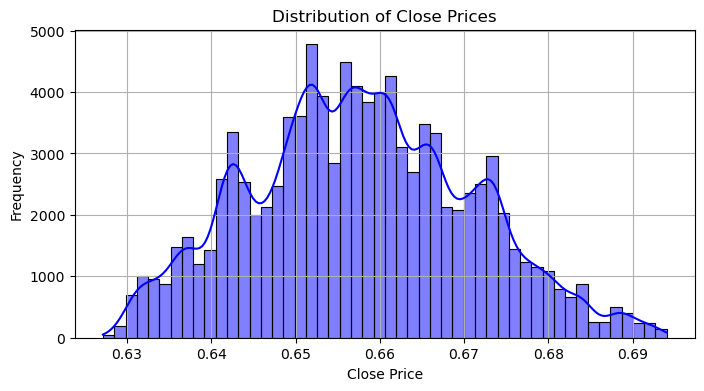

In [11]:
# Histogram of 'Close' prices to understand the range and distribution of values and detect any outliers
plt.figure(figsize=(8, 4))
sns.histplot(data['Close'], kde=True, bins=50, color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

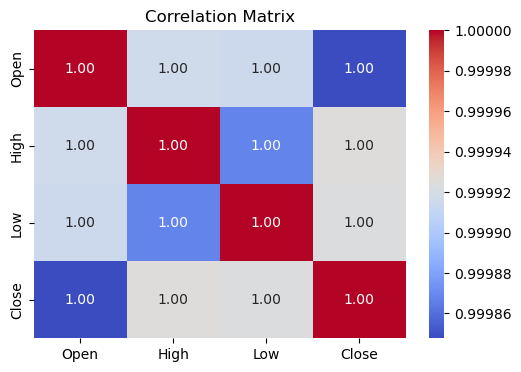

In [12]:
# Correlation Heatmap to shows the strength of relationships between numerical columns and to
# helps determine if certain features are redundant or strongly correlated.
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# keeping the original dataset
raw_data = data.copy()

In [14]:
# Feature engineering to enhance the dataset by creating new variables that provide additional predictive signals
# Creating Moving Averages to capture trends
data['MA_5'] = data['Close'].rolling(window=5).mean()  # 5-period moving average
data['MA_10'] = data['Close'].rolling(window=10).mean()  # 10-period moving average

# Creating High-Low Spread to measure volatility within each period
data['High_Low_Spread'] = data['High'] - data['Low']

# Creating Percentage Change to indicate momentum or trend direction
data['Pct_Change'] = (data['Close'] - data['Open']) / data['Open']

# Creating Bollinger Bands to measure price volatility
data['Bollinger_Upper'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Lower'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std())

# Droping rows with NaN values created due to rolling windows
data.dropna(inplace=True)

data.reset_index(drop=True, inplace=True)

data.head()

,Time,Open,High,Low,Close,MA_5,MA_10,High_Low_Spread,Pct_Change,Bollinger_Upper,Bollinger_Lower
0,2023-08-09 09:10:00,0.65567,0.65578,0.65551,0.65571,0.655664,0.655552,0.00027,0.000061,0.655844,0.655313
1,2023-08-09 09:15:00,0.65571,0.65590,0.65550,0.65582,0.655668,0.655568,0.00040,0.000168,0.655877,0.655343
2,2023-08-09 09:20:00,0.65582,0.65598,0.65569,0.65597,0.655750,0.655628,0.00029,0.000229,0.655953,0.655345
3,2023-08-09 09:25:00,0.65598,0.65625,0.65594,0.65596,0.655826,0.655706,0.00031,-0.000030,0.656014,0.655358
4,2023-08-09 09:30:00,0.65596,0.65669,0.65588,0.65640,0.655972,0.655800,0.00081,0.000671,0.656179,0.655361


In [15]:
# Checking min and max values before normalization
print(data.min())
print(data.max())

Time               2023-08-09 09:10:00
Open                           0.62715
High                           0.62732
Low                            0.62694
Close                          0.62715
MA_5                           0.62732
MA_10                         0.627412
High_Low_Spread                    0.0
Pct_Change                   -0.009017
Bollinger_Upper               0.627831
Bollinger_Lower               0.627146
dtype: object
Time               2024-12-10 17:00:00
Open                           0.69403
High                           0.69416
Low                            0.69382
Close                          0.69403
MA_5                          0.693802
MA_10                         0.693737
High_Low_Spread                0.00769
Pct_Change                    0.010441
Bollinger_Upper                0.69564
Bollinger_Lower               0.693459
dtype: object


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Defining columns to normalize
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'MA_5', 'MA_10', 
                        'High_Low_Spread', 'Pct_Change', 'Bollinger_Upper', 'Bollinger_Lower']
# Initialising MinMaxScaler
scaler = MinMaxScaler()

# Applying normalisation
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

data.head()

,Time,Open,High,Low,Close,MA_5,MA_10,High_Low_Spread,Pct_Change,Bollinger_Upper,Bollinger_Lower
0,2023-08-09 09:10:00,0.426435,0.425793,0.427183,0.427033,0.426341,0.424274,0.035111,0.466546,0.413120,0.424755
1,2023-08-09 09:15:00,0.427033,0.427588,0.427033,0.428678,0.426401,0.424516,0.052016,0.472032,0.413602,0.425210
2,2023-08-09 09:20:00,0.428678,0.428785,0.429874,0.430921,0.427635,0.425420,0.037711,0.475165,0.414730,0.425232
3,2023-08-09 09:25:00,0.431071,0.432825,0.433612,0.430772,0.428778,0.426596,0.040312,0.461844,0.415619,0.425434
4,2023-08-09 09:30:00,0.430772,0.439408,0.432715,0.437350,0.430974,0.428014,0.105332,0.497882,0.418064,0.425484


In [17]:
data.describe()

,Time,Open,High,Low,Close,MA_5,MA_10,High_Low_Spread,Pct_Change,Bollinger_Upper,Bollinger_Lower
count,99981,99981.000000,99981.000000,99981.000000,99981.000000,99981.000000,99981.000000,99981.000000,99981.000000,99981.000000,99981.000000
mean,2024-04-10 13:07:00.640922112,0.456515,0.456433,0.457436,0.456534,0.456715,0.456415,0.038316,0.463512,0.450212,0.455432
min,2023-08-09 09:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-12-08 07:50:00,0.322667,0.322561,0.323714,0.322667,0.322132,0.321689,0.022107,0.454990,0.319395,0.320955
50%,2024-04-11 03:05:00,0.450658,0.450479,0.451555,0.450658,0.450829,0.450539,0.032510,0.463411,0.444746,0.449307
75%,2024-08-09 22:00:00,0.590461,0.590066,0.591657,0.590461,0.591438,0.591421,0.046814,0.472008,0.580960,0.590950
max,2024-12-10 17:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.195646,0.195666,0.195749,0.195650,0.196793,0.197229,0.027709,0.017883,0.192634,0.197433


In [18]:
print(data.min())
print(data.max())

Time               2023-08-09 09:10:00
Open                               0.0
High                               0.0
Low                                0.0
Close                              0.0
MA_5                               0.0
MA_10                              0.0
High_Low_Spread                    0.0
Pct_Change                         0.0
Bollinger_Upper                    0.0
Bollinger_Lower                    0.0
dtype: object
Time               2024-12-10 17:00:00
Open                               1.0
High                               1.0
Low                                1.0
Close                              1.0
MA_5                               1.0
MA_10                              1.0
High_Low_Spread                    1.0
Pct_Change                         1.0
Bollinger_Upper                    1.0
Bollinger_Lower                    1.0
dtype: object


In [19]:
import numpy as np

# Defining the window size
window_size = 10  

# Creating sliding windows
def create_sliding_windows(data, target_column, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        # Input: past 'window_size' rows
        X.append(data.iloc[i:i + window_size].values)
        # Output: the next value of the target column
        y.append(data.iloc[i + window_size][target_column])
    return np.array(X), np.array(y)

# Creatign input-output pairs
X, y = create_sliding_windows(data[['Open', 'High', 'Low', 'Close', 'MA_5', 'MA_10', 
                                     'High_Low_Spread', 'Pct_Change', 
                                     'Bollinger_Upper', 'Bollinger_Lower']], 
                              target_column='Close', 
                              window_size=window_size)


print(X.shape)
print(y.shape)

(99971, 10, 10)
(99971,)


In [20]:
# Defining the split ratio: 80% for training
train_ratio = 0.8 
train_size = int(len(X) * train_ratio)  # Calculating the number of training samples

# Split the data while maintaining chronological order
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79976, 10, 10)
(79976,)
(19995, 10, 10)
(19995,)


# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [23]:
# Initialising the Linear Regression model
linear_model = LinearRegression()

# Fiting the model on the training data
linear_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predicting on the training and testing data
y_train_pred = linear_model.predict(X_train.reshape(X_train.shape[0], -1))
y_test_pred = linear_model.predict(X_test.reshape(X_test.shape[0], -1))

In [24]:
# Calculating training and testing metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Displaying the results
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")

Training MSE: 1.1751232340266348e-05
Training MAE: 0.0022674453197607603
Testing MSE: 1.2361396251926239e-05
Testing MAE: 0.0024177082089153756


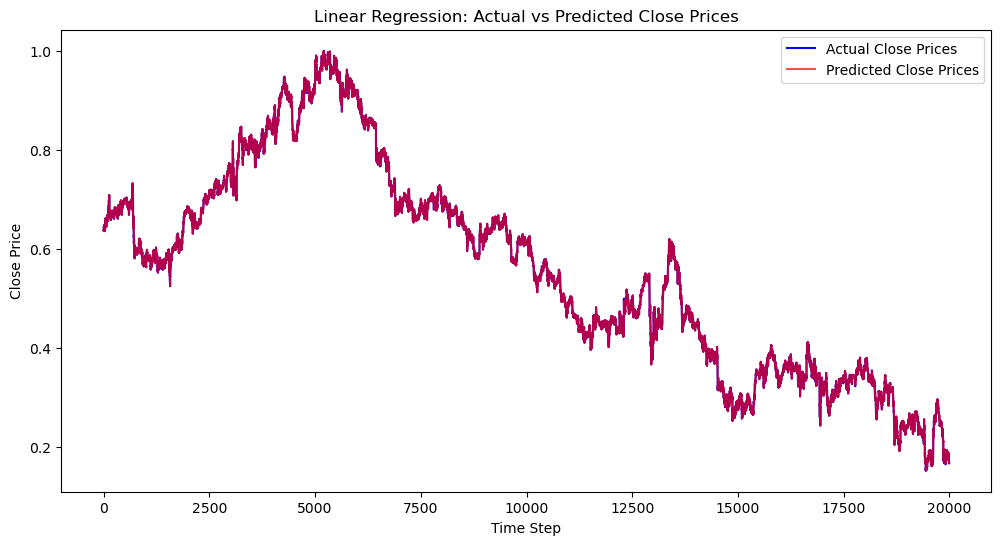

In [25]:
import matplotlib.pyplot as plt

# Ploting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Close Prices', color='red', alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# MLP

In [27]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Reseting Keras session to ensure a clean environment
K.clear_session()
tf.keras.backend.clear_session()
print("Environment reset complete.")

# Importing necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


Environment reset complete.


In [28]:
# Defining the MLP model
mlp_model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compiling the model with Mean Squared Error loss and Adam optimizer
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

mlp_model.summary()

C:\Users\marit\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the MLP model
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0037 - mae: 0.0162 - val_loss: 6.7569e-05 - val_mae: 0.0066
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.5421e-05 - mae: 0.0044 - val_loss: 2.1173e-05 - val_mae: 0.0034
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.3053e-05 - mae: 0.0043 - val_loss: 2.0850e-05 - val_mae: 0.0035
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.7220e-05 - mae: 0.0038 - val_loss: 4.1368e-05 - val_mae: 0.0054
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3860e-05 - mae: 0.0036 - val_loss: 9.2010e-05 - val_mae: 0.0086
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8219e-05 - mae: 0.0039 - val_loss: 6.9139e-05 - val_mae: 0.0074
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2484e-05 - mae: 0.0034 - val_loss: 6.5569e-05 - val_mae: 0.0072
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.1356e-05 - mae: 0.0034 - val_loss: 1.3648e-0

In [30]:
# Evaluating the model
train_loss, train_mae = mlp_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = mlp_model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss (MSE): {train_loss:.6f}")
print(f"Training MAE: {train_mae:.6f}")
print(f"Testing Loss (MSE): {test_loss:.6f}")
print(f"Testing MAE: {test_mae:.6f}")

Training Loss (MSE): 0.000013
Training MAE: 0.002384
Testing Loss (MSE): 0.000014
Testing MAE: 0.002555


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


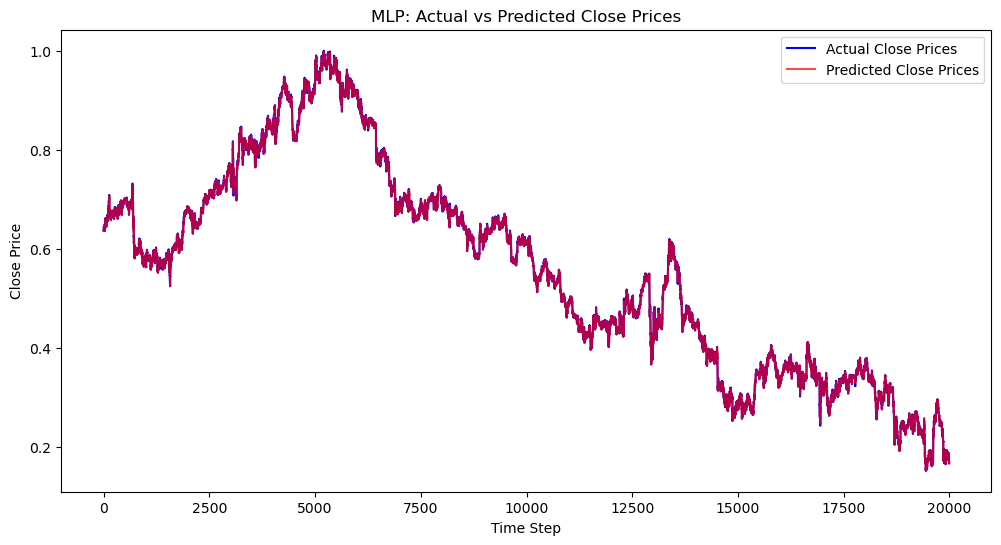

In [31]:
# Making predictions on the test set
y_test_pred = mlp_model.predict(X_test)

# Ploting actual vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Close Prices', color='red', alpha=0.7)
plt.title('MLP: Actual vs Predicted Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

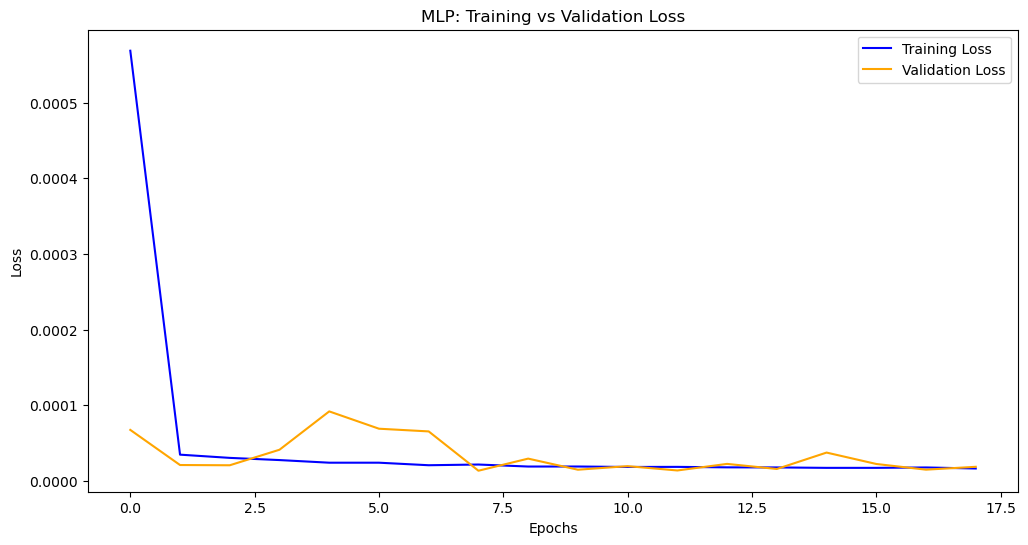

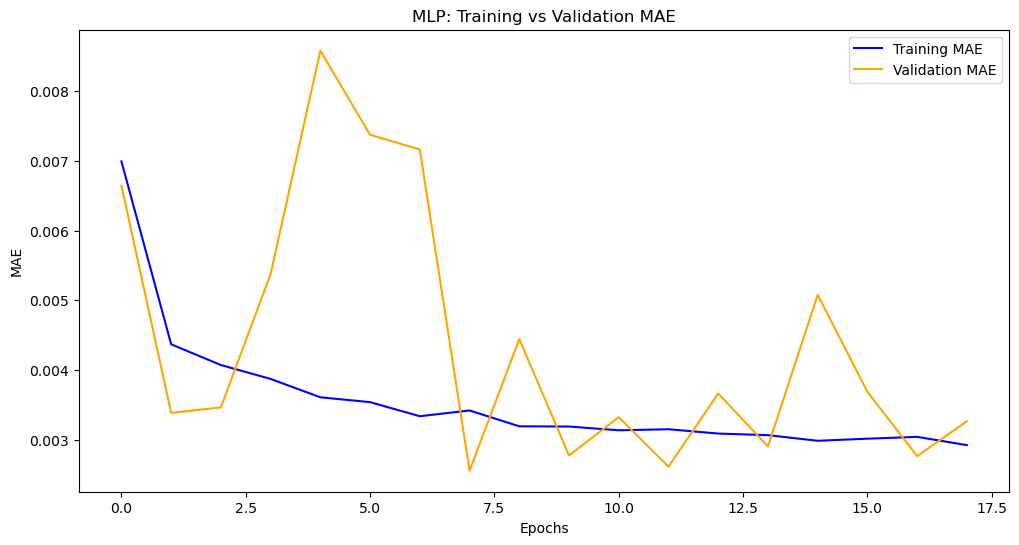

In [32]:
# Extracting Loss and MAE values from the MLP history
mlp_train_loss = history.history['loss']
mlp_val_loss = history.history['val_loss']
mlp_train_mae = history.history['mae']
mlp_val_mae = history.history['val_mae']

# Plotting Training and Validation Loss for MLP
plt.figure(figsize=(12, 6))
plt.plot(mlp_train_loss, label='Training Loss', color='blue')
plt.plot(mlp_val_loss, label='Validation Loss', color='orange')
plt.title('MLP: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training and Validation MAE for MLP
plt.figure(figsize=(12, 6))
plt.plot(mlp_train_mae, label='Training MAE', color='blue')
plt.plot(mlp_val_mae, label='Validation MAE', color='orange')
plt.title('MLP: Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# LSTM

In [34]:
K.clear_session()
tf.keras.backend.clear_session()
print("Environment reset complete.")

Environment reset complete.


In [35]:
from tensorflow.keras.layers import LSTM, Dense

In [36]:
# Defining the LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

# Summarising the model architecture
lstm_model.summary()

C:\Users\marit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,313 (83.25 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compiling the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [38]:
# Adding EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [39]:
# Training the model
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0012 - mae: 0.0113 - val_loss: 2.9799e-05 - val_mae: 0.0039
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 2.5482e-05 - mae: 0.0037 - val_loss: 2.7188e-05 - val_mae: 0.0041
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 2.1506e-05 - mae: 0.0034 - val_loss: 2.0163e-05 - val_mae: 0.0034
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 1.9423e-05 - mae: 0.0032 - val_loss: 6.0955e-05 - val_mae: 0.0067
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.8631e-05 - mae: 0.0032 - val_loss: 1.4375e-05 - val_mae: 0.0027
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.7138e-05 - mae: 0.0030 - val_loss: 1.3068e-05 - val_mae: 0.0025
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.5188e-05 - mae: 0.0028 - val_loss: 1.3838e-05 - val_mae: 0.0026
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 1.5102e-05 - mae: 0.0028 - val_loss: 1

In [40]:
# Evaluating the model on training and testing data
train_loss, train_mae = lstm_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = lstm_model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss (MSE): {train_loss:.6f}")
print(f"Training MAE: {train_mae:.6f}")
print(f"Testing Loss (MSE): {test_loss:.6f}")
print(f"Testing MAE: {test_mae:.6f}")

Training Loss (MSE): 0.000012
Training MAE: 0.002344
Testing Loss (MSE): 0.000013
Testing MAE: 0.002503


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


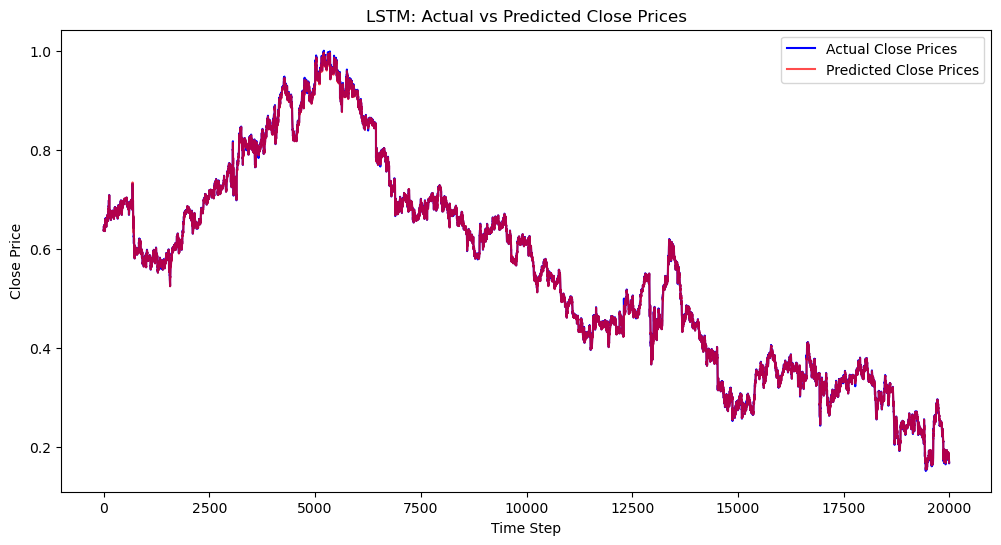

In [41]:
# Making predictions on the test set
y_test_pred = lstm_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Close Prices', color='red', alpha=0.7)
plt.title('LSTM: Actual vs Predicted Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

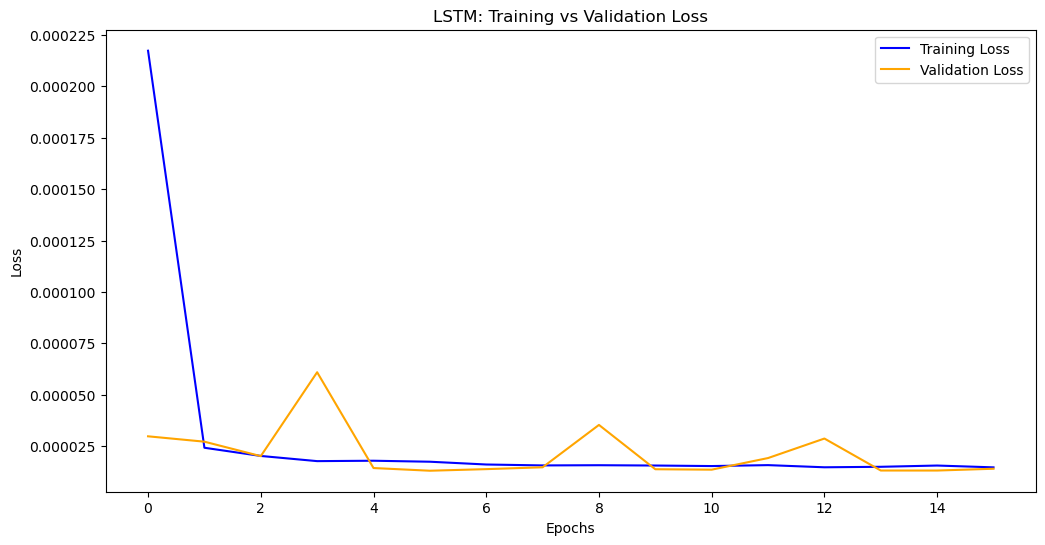

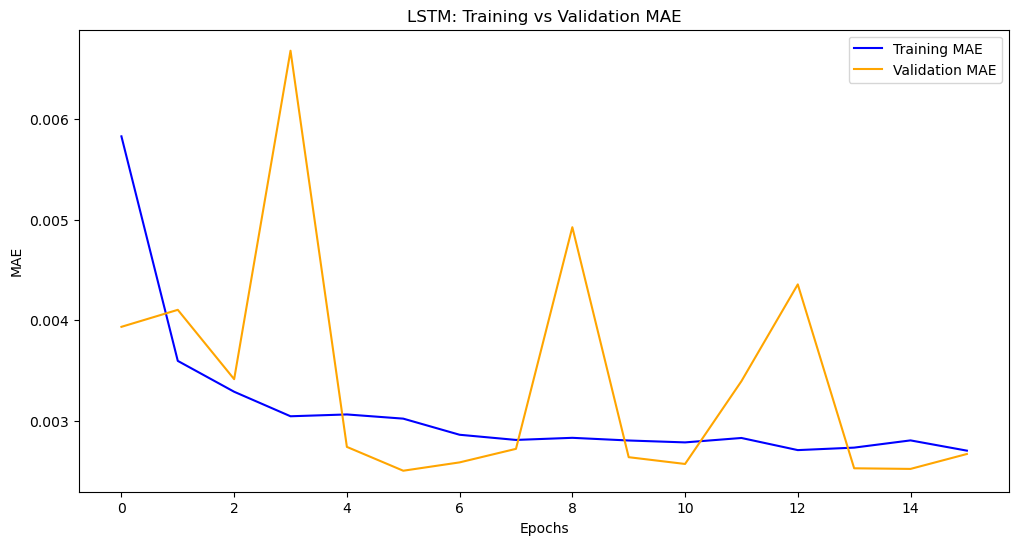

In [42]:
# Extracting Loss and MAE values from LSTM training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Plotting Training and Validation Loss for LSTM
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('LSTM: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training and Validation MAE for LSTM
plt.figure(figsize=(12, 6))
plt.plot(train_mae, label='Training MAE', color='blue')
plt.plot(val_mae, label='Validation MAE', color='orange')
plt.title('LSTM: Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# GRU

In [44]:
K.clear_session()
tf.keras.backend.clear_session()
print("Environment reset complete.")

Environment reset complete.


In [45]:
from tensorflow.keras.layers import GRU, Dense

# Defining the GRU model
gru_model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

gru_model.summary()


C:\Users\marit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,705 (65.25 KB)

 Trainable params: 16,705 (65.25 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [48]:
history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 7.0306e-04 - mae: 0.0086 - val_loss: 3.8274e-05 - val_mae: 0.0049
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 2.0479e-05 - mae: 0.0033 - val_loss: 3.0573e-05 - val_mae: 0.0045
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.9602e-05 - mae: 0.0032 - val_loss: 3.1217e-05 - val_mae: 0.0045
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 1.8923e-05 - mae: 0.0032 - val_loss: 1.6411e-05 - val_mae: 0.0030
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.7995e-05 - mae: 0.0031 - val_loss: 1.4748e-05 - val_mae: 0.0028
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.6509e-05 - mae: 0.0029 - val_loss: 1.6094e-05 - val_mae: 0.0029
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.6506e-05 - mae: 0.0030 - val_loss: 1.6788e-05 - val_mae: 0.0030
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.6544e-05 - mae: 0.0029 - val_los

In [49]:
train_loss, train_mae = gru_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = gru_model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss (MSE): {train_loss:.6f}")
print(f"Training MAE: {train_mae:.6f}")
print(f"Testing Loss (MSE): {test_loss:.6f}")
print(f"Testing MAE: {test_mae:.6f}")

Training Loss (MSE): 0.000012
Training MAE: 0.002299
Testing Loss (MSE): 0.000013
Testing MAE: 0.002456


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


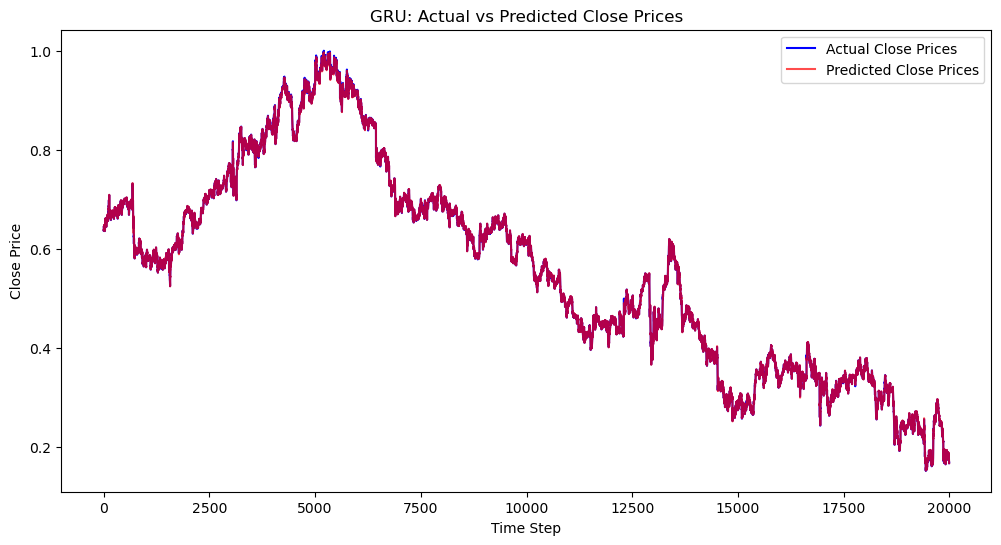

In [50]:
y_test_pred = gru_model.predict(X_test)

# Ploting actual vs predicted close prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Close Prices', color='red', alpha=0.7)
plt.title('GRU: Actual vs Predicted Close Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()

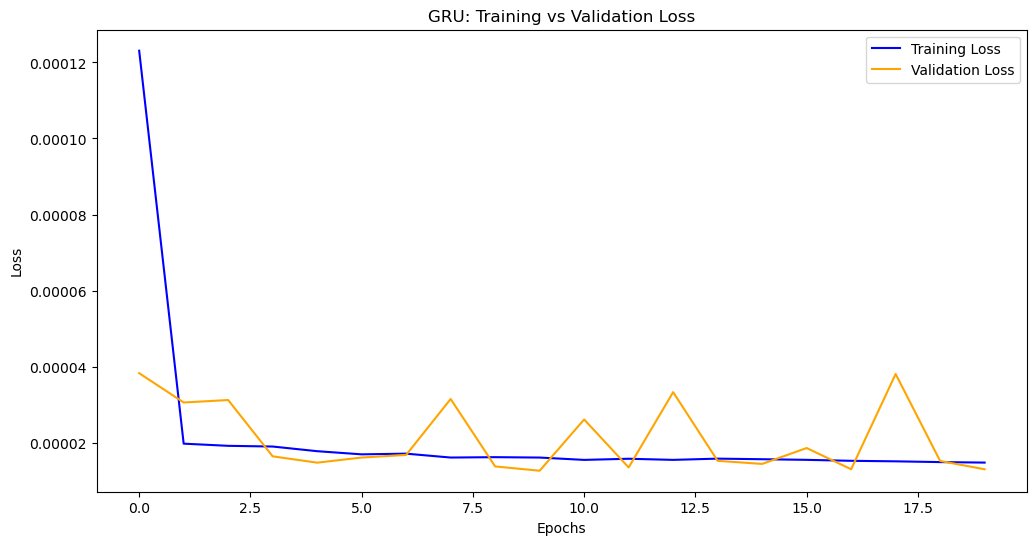

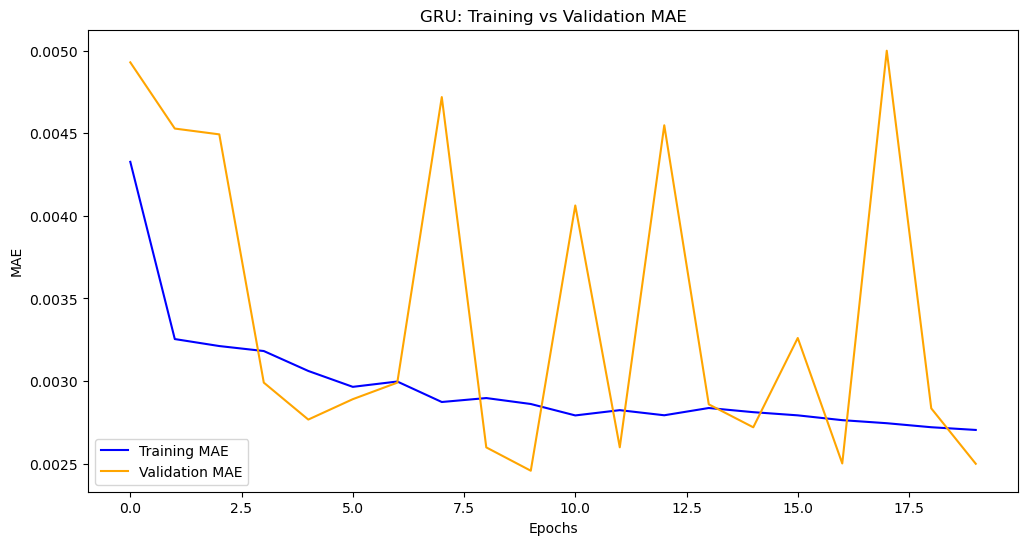

In [51]:
# Extracting Loss and MAE values from GRU training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Plotting Training and Validation Loss for GRU
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('GRU: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training and Validation MAE for GRU
plt.figure(figsize=(12, 6))
plt.plot(train_mae, label='Training MAE', color='blue')
plt.plot(val_mae, label='Validation MAE', color='orange')
plt.title('GRU: Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()